In [ ]:
# 1 week Assignment(4)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/wjdwl/Desktop/Data/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [20]:
X = df.drop('Rings',axis=1)
X.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [22]:
y = df['Rings']
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
X['Sex']=labelencoder.fit_transform(X['Sex'])

In [28]:
Y = pd.get_dummies(y).values

In [30]:
X = X.values

In [32]:
X

array([[0.000e+00, 2.000e+00, 4.550e-01, ..., 2.245e-01, 1.010e-01,
        1.500e-01],
       [1.000e+00, 2.000e+00, 3.500e-01, ..., 9.950e-02, 4.850e-02,
        7.000e-02],
       [2.000e+00, 0.000e+00, 5.300e-01, ..., 2.565e-01, 1.415e-01,
        2.100e-01],
       ...,
       [4.174e+03, 2.000e+00, 6.000e-01, ..., 5.255e-01, 2.875e-01,
        3.080e-01],
       [4.175e+03, 0.000e+00, 6.250e-01, ..., 5.310e-01, 2.610e-01,
        2.960e-01],
       [4.176e+03, 2.000e+00, 7.100e-01, ..., 9.455e-01, 3.765e-01,
        4.950e-01]])

In [25]:
y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((614, 7), (614, 248), (154, 7), (154, 248))

In [71]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(8,activation="tanh"),
    layers.Dense(8,activation="tanh"),
    layers.Dense(1)
])

In [73]:
model.compile(optimizer="adam",loss="mse",metrics=["mse"])

In [75]:
N_EPOCHS = 10

history=model.fit(X_train, y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.5952 - mse: 0.5952 - val_loss: 0.2195 - val_mse: 0.2195
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1849 - mse: 0.1849 - val_loss: 0.0911 - val_mse: 0.0911
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0906 - mse: 0.0906 - val_loss: 0.0681 - val_mse: 0.0681
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0743 - mse: 0.0743 - val_loss: 0.0535 - val_mse: 0.0535
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0421 - val_mse: 0.0421
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0450 - mse: 0.0450 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0391 - mse: 0.0391 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0282 - mse:

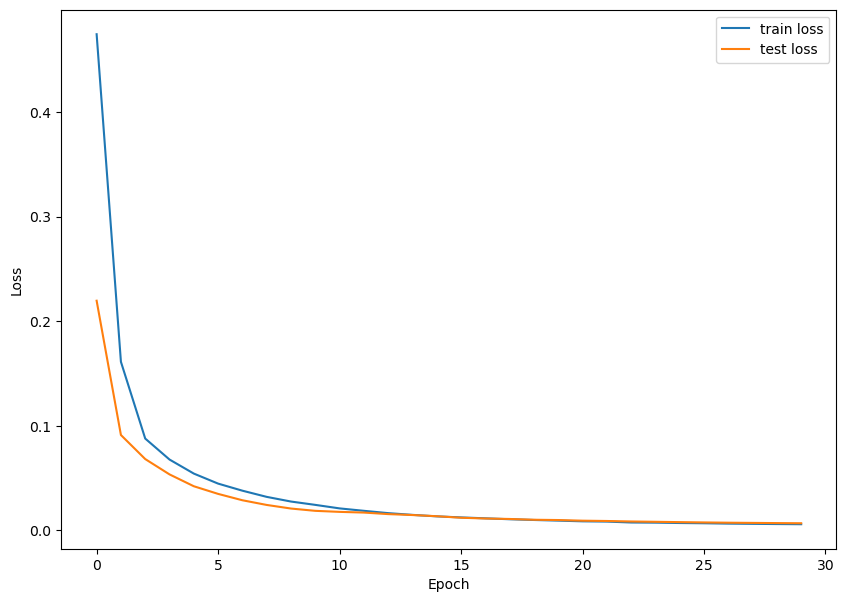

In [88]:
import matplotlib.pyplot as plt
epochs = range(len(history.history['loss']))

plt.figure(figsize=(10, 7))
plt.plot(epochs, history.history['loss'], label='train loss')
plt.plot(epochs, history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [86]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066 - mse: 0.0066 


[0.006753294728696346, 0.006753294728696346]